# Cancer
  
### Problem explanation:

Like other cancers, breast cancer is an uncontrolled growth of breast cells. Breast cancer occurs as a result of abnormal changes or mutation in the genes responsible for regulating the healthy growth of breast. The genes are in each cell’s nucleus, which acts as the “controller” of concern cell.

This abnormal tumour-like growth can be benign (not cancerous) or malignant (cancerous property). Benign tumours are close to normal in appearance, they grow comparatively slowly, and they do not invade or spread to nearby tissue and other parts of the body. As malignant cells have the potential to grow as cancer If they are left unchecked or untreated, they eventually can spread to nearby tissue and beyond an original tumour to other parts of the body.
 We need to classify a tumor as either benign or malignant based on cell descriptions gathered by microscopic examination. 
The data was originally obtained from the University of Wisconsin Hospitals, Madison, from Dr. William H. Wolberg. Data set has 699 observations, all inputs are continuous, 65.5% of the examples are benign. The dataset itself is located here, in the field cancer.

This is classification problem and the results are two outputs, benign or malign. Model inputs are:
 
* Clump thickness,
* Uniformity of cell size,
* Uniformiti of cell shape,
* Marginal adhesion,
* Single epithelial cell size,
* Bare nuclei,
* Bland chromatin,
* Normal nucleoli,
* Mitoses.

### Problem solution:
Data set contains only 699 observations, so it is relatively small data set. We have divided the data set in two sets, training set, which contains 599 observations and test set, which contains 100 observations.  We solved problem in three ways:

* Manually buiilding ANN,
* Tune some hyperparameters by using grid search and
* Employing Black Fox service.

We evaluate the performance of the models using K-fold cross validation. For the purpose of feature scaling, we apply a min max scaler. To stop the training at the right time, Keras' early stopping scheme is applied.
 

### Update Keras to latest version:

In [1]:
!pip install keras==2.2.4

    100% |████████████████████████████████| 317kB 10.2MB/s ta 0:00:01
  Found existing installation: Keras 2.2.2
    Uninstalling Keras-2.2.2:
      Successfully uninstalled Keras-2.2.2


# Data preprocessing
#### Importing data frame

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
plt.style.use('ggplot')

# Importing the date as data frame wich we will import with pandas using the read_csv function.
dataframe = pd.read_csv('CancerData.csv')

#### Dataset info

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Clump Thickness                699 non-null float64
Uniformity of Cell Size        699 non-null float64
Uniformity of Cell Shape       699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    699 non-null float64
Bland Chromatin                699 non-null float64
Normal Nucleoli                699 non-null float64
Mitoses                        699 non-null float64
Benign                         699 non-null int64
Malignant                      699 non-null int64
dtypes: float64(9), int64(2)
memory usage: 60.1 KB


#### Dataset description

In [4]:
dataframe.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Benign,Malignant
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,0.441774,0.313448,0.320744,0.280687,0.321602,0.354363,0.343777,0.286695,0.158941,0.655222,0.344778
std,0.281574,0.305146,0.297191,0.285538,0.221430,0.360186,0.243836,0.305363,0.171508,0.475636,0.475636
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,0.200000,0.100000,0.100000,0.100000,0.200000,0.100000,0.200000,0.100000,0.100000,0.000000,0.000000
50%,0.400000,0.100000,0.100000,0.100000,0.200000,0.100000,0.300000,0.100000,0.100000,1.000000,0.000000
75%,0.600000,0.500000,0.500000,0.400000,0.400000,0.500000,0.500000,0.400000,0.100000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Histograms of the numerical features

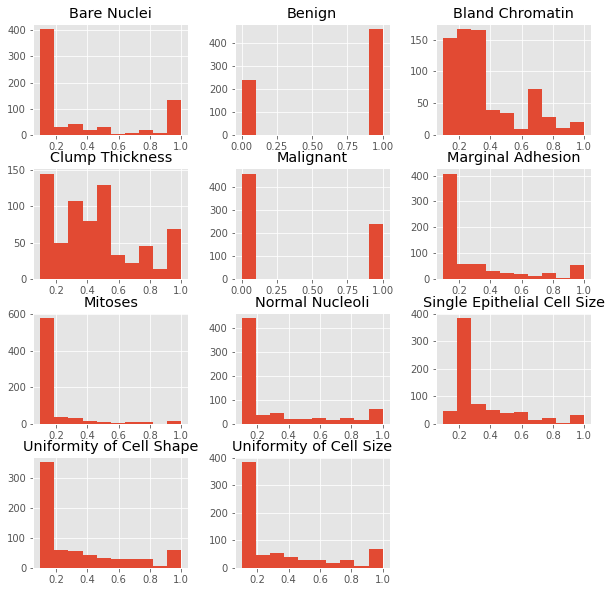

In [5]:
dataframe.hist(figsize=(10,10));

#### Corelation heatmap

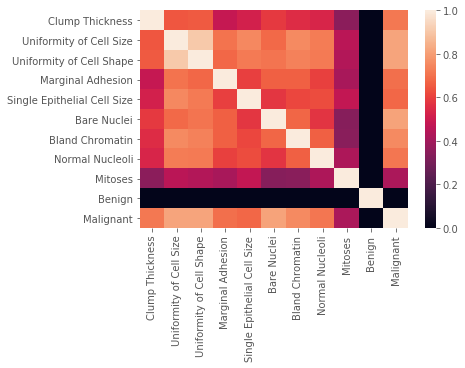

In [6]:
sns.heatmap(dataframe.corr(), vmin=0, vmax=1);

####  Separate the data frame into feature matrix X and dependent variable y

In [7]:
X = dataframe.iloc[:, 0:9].values
y = dataframe.iloc[:, 9:11].values

#### Split the entire data set into the training set and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)

# Option 1 - manually build ANN using Keras

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import Callback, TensorBoard, ModelCheckpoint
from keras.callbacks import EarlyStopping

import time
start1 = time.time()

classifier = Sequential()
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 9))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))
es = EarlyStopping(monitor = 'val_loss',
                   mode = 'auto',
                   #min_delta = 1e-2,
                   patience = 150,
                   verbose = 1,
                   #baseline=0.4,
                   restore_best_weights = True
                  )
classifier.compile(optimizer = 'rmsprop', loss = 'mean_absolute_error', metrics = ['accuracy'])
classifier.fit(x = X_train, y = y_train, validation_split = 0.3, batch_size = 32, epochs = 3000, callbacks = [es], verbose=1)

end1 = time.time()

time1 = int(end1-start1)
minutes1, seconds1= divmod(time1, 60)
hours1, minutes1= divmod(minutes1, 60)

Using TensorFlow backend.


Train on 464 samples, validate on 200 samples
Epoch 1/3000
464/464 [==============================] - 1s 1ms/step - loss: 0.4946 - acc: 0.6659 - val_loss: 0.4939 - val_acc: 0.6050
Epoch 2/3000
464/464 [==============================] - 0s 109us/step - loss: 0.4853 - acc: 0.6918 - val_loss: 0.4895 - val_acc: 0.6050
Epoch 3/3000
464/464 [==============================] - 0s 128us/step - loss: 0.4772 - acc: 0.6918 - val_loss: 0.4850 - val_acc: 0.6050
.
.
.


Epoch 1033/3000
464/464 [==============================] - 0s 66us/step - loss: 0.0194 - acc: 0.9806 - val_loss: 0.0400 - val_acc: 0.9600
Epoch 1034/3000
464/464 [==============================] - 0s 69us/step - loss: 0.0194 - acc: 0.9806 - val_loss: 0.0400 - val_acc: 0.9600
Epoch 1035/3000
464/464 [==============================] - 0s 69us/step - loss: 0.0194 - acc: 0.9806 - val_loss: 0.0400 - val_acc: 0.9600
Restoring model weights from the end of the best epoch
Epoch 01035: early stopping


#### Plot loss during training

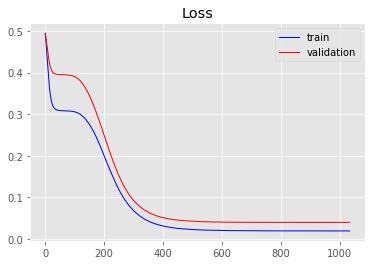

In [10]:
plt.title('Loss')
plt.plot(classifier.history.history['loss'], label = 'train', color = 'blue', linewidth=1)
plt.plot(classifier.history.history['val_loss'], label = 'validation', color = 'red', linewidth=1)
plt.legend()
plt.show()

#### Plot accuracy during training

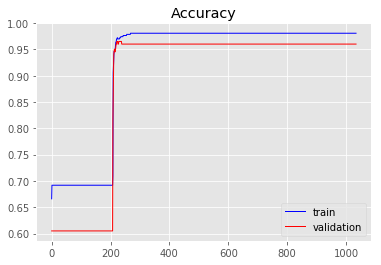

In [11]:
plt.title('Accuracy')
plt.plot(classifier.history.history['acc'], label='train', color = 'blue', linewidth=1)
plt.plot(classifier.history.history['val_acc'], label='validation', color = 'red', linewidth=1)
plt.legend()
plt.show()

#### We just trained our artificial neural network on the training set and now it's time to make the prediction on the test set

In [12]:
y_pred_trained = classifier.predict(X_test)
#print("Predicted values are:\n\n", y_pred_trained[:10,:])

y_pred_for_confusionMatrix = (y_pred_trained[:,0] > y_pred_trained[:,1])
y_pred_for_confusionMatrix = np.where(y_pred_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = (y_test[:,0] > y_test[:,1])
y_test_for_confusionMatrix = np.where(y_test_for_confusionMatrix == True, 1, 0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_for_confusionMatrix, y_test_for_confusionMatrix)

errorOnTestSetTrained = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

print("\nTime to manually train one network is ", time1,"seconds(",hours1,"hours,",minutes1,"minutes and ",seconds1,"seconds ).")
print("\nWe got confusion matrix:\n",cm)
print("\nTest set error on manually train one network, which we can read in confusion matrix is",errorOnTestSetTrained,"%.")


Time to manually train one network is  52 seconds( 0 hours, 0 minutes and  52 seconds ).

We got confusion matrix:
 [[19  1]
 [ 0 15]]

Test set error on manually train one network, which we can read in confusion matrix is 2.857142857142857 %.


# Option 2 - Parameter tuning by Grid search
We have two type of model parameters, __the weights__ obtained during training process, and parameters that stay fixed, called the __hyperparameters__. The examples of th hyperparameters are __number of epochs__, __batch size__, __type of optimizer__, __number of layers__, __the number of neurons layers__ etc. The ANN trained in __Option 1__ used fixed values of these hyperparameters, but perhaps some other values would lead us to a better accuracy.

The parameter tuning is all about finding the best values of the hyperparameters. We will try this using a simple technique called __Grid search__ that will test several combinations of hyperparameter and return the best choice that leads to the best accuracy obtained by K-fold cross validation.

In [13]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

import time
start2 = time.time()

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 9))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'mean_absolute_error', metrics = ['accuracy'])
    return classifier

Tuning_classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size' : [25, 32],
              'epochs' : [100, 500, 3000],
              'optimizer' : ['adam','rmsprop']}

grid_search = GridSearchCV(estimator=Tuning_classifier,
                           param_grid=parameters,
                           #scoring='accurasy',
                           cv=10
                          )

grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters are :\n", best_parameters)
print("\nBest accuracy is :\n", best_accuracy)


end2 = time.time()

time2 = int(end2-start2)
minutes2, seconds2= divmod(time2, 60)
hours2, minutes2= divmod(minutes2, 60)

Epoch 1/100
597/597 [==============================] - 0s 655us/step - loss: 0.4939 - acc: 0.6566
Epoch 2/100
597/597 [==============================] - 0s 72us/step - loss: 0.4840 - acc: 0.6566
Epoch 3/100
597/597 [==============================] - 0s 115us/step - loss: 0.4733 - acc: 0.6566
.
.
.


Epoch 2998/3000
664/664 [==============================] - 0s 303us/step - loss: 0.0211 - acc: 0.9789
Epoch 2999/3000
664/664 [==============================] - 0s 364us/step - loss: 0.0211 - acc: 0.9789
Epoch 3000/3000
664/664 [==============================] - 0s 221us/step - loss: 0.0211 - acc: 0.9789
Best parameters are :
 {'batch_size': 25, 'epochs': 3000, 'optimizer': 'rmsprop'}

Best accuracy is :
 0.9713855377701391


#### Our optimized ANN resides in grid_search. Now it's time to make the prediction on the test set

In [14]:
y_pred_tuning = grid_search.predict_proba(X_test)
#print("Predicted values are:\n\n", y_pred_tuning[:10,:])

y_pred_tuning_for_confusionMatrix = (y_pred_tuning[:,0] > y_pred_tuning[:,1])
y_pred_tuning_for_confusionMatrix = np.where(y_pred_tuning_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = (y_test[:,0] > y_test[:,1])
y_test_for_confusionMatrix = np.where(y_test_for_confusionMatrix == True, 1, 0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_for_confusionMatrix, y_pred_tuning_for_confusionMatrix)

errorOnTestSetTuning = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

print("\nTime needed for tuning is ", time2,"seconds(",hours2,"hours,",minutes2,"minutes and ",seconds2,"seconds).")
print("\nWe got confusion matrix:\n",cm)
print("\nTest set error with tuning, which we can read in confusion matrix is",errorOnTestSetTuning,"%.")


Time needed for tuning is  16497 seconds( 4 hours, 34 minutes and  57 seconds).

We got confusion matrix:
 [[19  0]
 [ 1 15]]

Test set error with tuning, which we can read in confusion matrix is 2.857142857142857 %.


# Option 3 - Optimize ANN using Black Fox service

#### Install Black fox service

In [15]:
!pip install git+https://github.com/tmrdja/BlackFoxPython.git

  Cloning https://github.com/tmrdja/BlackFoxPython.git to /tmp/pip-req-build-63a1t1vg
  Stored in directory: /tmp/pip-ephem-wheel-cache-gpgp6k92/wheels/46/d5/ca/47789f92af70d12cb6fc5f0c752e911491b82477816f26da21
Successfully built blackfox


#### Let's run the Black Fox service to find best ANN for the specific problem. Note that we optimize the architecture, as well!

In [16]:
# Importing the BF service libraries
from blackfox import BlackFox
from blackfox import KerasOptimizationConfig
from blackfox import OptimizationEngineConfig
import h5py
#from keras.models import load_model
#import numpy as np
#import pandas as pd

blackfox_url = 'http://147.91.204.14:32701'
bf = BlackFox(blackfox_url)

ec = OptimizationEngineConfig(proc_timeout_miliseconds=2000000, population_size=50, max_num_of_generations=10)
c = KerasOptimizationConfig(engine_config=ec, max_epoch = 3000, validation_split=0.1)

import time
start3 = time.time()

# Use CTRL + C to stop optimization
(ann_io, ann_info, ann_metadata) = bf.optimize_keras_sync(
    input_set = X_train,
    output_set = y_train,
    config = c,
    integrate_scaler=False,
    network_path='OptimizedANNCancer_final.h5'
)

end3 = time.time()
time3 = int(end3-start3)

print('\nann info:')
print(ann_info)

print('\nann metadata:')
print(ann_metadata)

Use CTRL + C to stop optimization
Uploading data set
Starting...
2019-03-29 12:01:01.555579 -> Active, Generation: 0/10, Validation set error: 0.000000, Training set error: 0.000000, Epoch: 0, Optimization Id: dedeb7a2-c012-441d-9d33-c46c914d719b
2019-03-29 12:06:01.107584 -> Active, Generation: 1/10, Validation set error: 0.044776, Training set error: 0.018425, Epoch: 2999, Optimization Id: dedeb7a2-c012-441d-9d33-c46c914d719b
.
.
.


2019-03-29 12:23:30.920344 -> Active, Generation: 9/10, Validation set error: 0.044776, Training set error: 0.018430, Epoch: 2996, Optimization Id: dedeb7a2-c012-441d-9d33-c46c914d719b
2019-03-29 12:23:36.372904 -> Finished, Generation: 10/10, Validation set error: 0.044776, Training set error: 0.018432, Epoch: 2808, Optimization Id: dedeb7a2-c012-441d-9d33-c46c914d719b
stopped Finished
Saving network b2178768ef603b7b61285d5c0b64616a0976d156 to OptimizedANNCancer_final.h5

ann info:
{'dropout': 0.0,
 'hidden_layers': [{'activation_function': 'Sigmoid', 'neuron_count': 9}],
 'id': 'b2178768ef603b7b61285d5c0b64616a0976d156',
 'output_layer_activation_function': 'Sigmoid',
 'training_algorithm': 'Nadam'}

ann metadata:
{'__version': 1, 'is_scaler_integrated': False, 'scaler_config': {'input': {'feature_range': [0, 1], 'fit': [[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], 'inverse_transform': False}, 'output': {'feature_range': [0, 1], 'fit'

#### The data set passed to the Black Fox service was not scaled since Black Fox scales inputs automatically. In order to apply obtained ANN in prediction, BlackFox offers the utility function to scale our test set the same way.

In [17]:
# Get metadata
meta = bf.get_metadata('OptimizedANNCancer_final.h5')
scaler_config = meta['scaler_config']

# Scale
x_scaler_config = scaler_config['input']
from sklearn.preprocessing import MinMaxScaler 
min_max_x = MinMaxScaler(feature_range=x_scaler_config['feature_range'])
min_max_x.fit(x_scaler_config['fit'])

X_test_minMaxScaled_withBF = min_max_x.transform(X_test)
#print(X_test_minMaxScaled_withBF[:10,:])

#### Prediction using ANN proposed by Black Fox

In [18]:
#Importing ANN model
from keras.models import load_model
model = load_model('OptimizedANNCancer_final.h5')

y_pred_BF=model.predict(X_test_minMaxScaled_withBF)
#print("Predicted values are:\n\n", y_pred_BF[:10,:])

#### Rescale

In [19]:
# Rescale
y_scaler_config = scaler_config['output']
min_max_y = MinMaxScaler(feature_range=y_scaler_config['feature_range'])
min_max_y.fit(y_scaler_config['fit'])

y_pred_BF_realValues = min_max_y.inverse_transform(y_pred_BF)
#print("\nFirst 6 real predicted values are:\n", y_pred_BF_realValues[:6,:])

#y_pred_BF_realValues = mms_y.inverse_transform(y_pred_BF)
#print("\nFirst 6 real predicted values are:\n", y_pred_BF_realValues[:6,:])

#### Compute error

In [20]:
y_pred_BF_for_confusionMatrix = (y_pred_BF_realValues[:,0]>y_pred_BF[:,1])
y_pred_BF_for_confusionMatrix = np.where(y_pred_BF_for_confusionMatrix == True, 1, 0)
y_test_for_confusionMatrix = (y_test[:,0]>y_test[:,1])
y_test_for_confusionMatrix = np.where(y_test_for_confusionMatrix == True, 1, 0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_BF_for_confusionMatrix, y_test_for_confusionMatrix)

errorOnTestSetBF = 100*(cm[0,1]+cm[1,0])/y_test.shape[0]

minutes3, seconds3= divmod(time3, 60)
hours3, minutes3= divmod(minutes3, 60)

print("\nTime for finding the best ANN by Black Fox service is ", time3,"seconds(",hours3,"hours,",minutes3,"minutes and ",seconds3,"seconds).")
print("\nWe got confusion matrix:\n",cm)
print("\nTest set error for finding the best ANN by Black Fox service, which we can read in confusion matrix is",errorOnTestSetBF,"%.")


Time for finding the best ANN by Black Fox service is  1363 seconds( 0 hours, 22 minutes and  43 seconds).

We got confusion matrix:
 [[19  1]
 [ 0 15]]

Test set error for finding the best ANN by Black Fox service, which we can read in confusion matrix is 2.857142857142857 %.


# RESULTS AND DISCUSSION

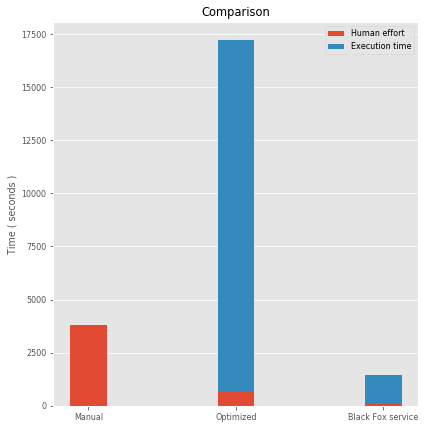

In [21]:
plt.style.use('ggplot')
mpl.rc('lines', linewidth=1)
mpl.rc('font', size='8')

n_groups = 3
group_1 = (Human_time1, Human_time2, Human_time3)
group_2 = (time1, time2, time3)

 
# create plot
fig, ax = plt.subplots(figsize=(6,6))
ax.xaxis.grid(False)
index = np.arange(n_groups)
bar_width = 0.25
space = 0.05
opacity = 1
  
rects1 = plt.bar(index, group_1, bar_width,align ='center',
alpha=opacity,
label='Human effort')

rects2 = plt.bar(index, group_2, bar_width,align ='center',bottom =group_1,
alpha=opacity,
label='Execution time')

plt.title('Comparison')
plt.xticks(index, ('Manual', 'Optimized', 'Black Fox service'))
plt.legend(loc = 'best')
 
plt.ylabel('Time ( seconds )')
plt.tight_layout()
plt.show()

#### If we want to compare the results by creating ANN manually and by employing the Black Fox service, we would need to add the time spent in field "TrainingANN" and "TuningANN" in plot above, and that added time would be comparatible with time Black Fox service spent, which are so different, time needed for manually hard work is much larger then time Black Fox spent to make better results, that are given in the plot below.

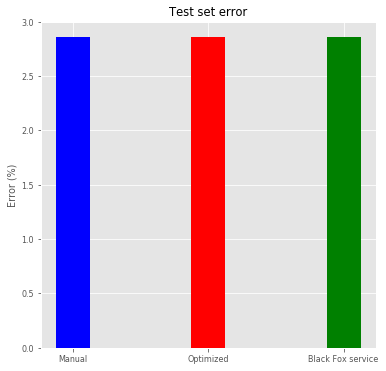

In [22]:
mpl.rc('lines', linewidth=1)
mpl.rc('font', size='8')
fig, ax = plt.subplots(figsize=(6,6))

objects = ('Manual', 'Optimized', 'Black Fox service')
y_pos = np.arange(len(objects))
performance = [errorOnTestSetTrained,errorOnTestSetTuning,errorOnTestSetBF]
 
plt.bar(y_pos, performance, align='center', alpha=1, color=('blue','red','green'), width = 0.25)
plt.xticks(y_pos, objects)
plt.ylabel('Error (%)')
plt.title('Test set error')
 
plt.show()

#### Although we measured this three options, actually they are not so comparable, because in Python we had a man sitting in office and programming those neural networks (options 1 and 2) while in Black Fox service (option 3), he imported the same data set and the service did the rest, while he went to rest or dring coffe, for example, so actually, in Black Fox service he wrote few lines of code and thats all of hard work. Results in the given plots above speak for themself. As you can see, Black Fox service gave better results in less time and effort to create approximate results in Python as Black Fox did is immeasurably large.